<a href="https://colab.research.google.com/github/elmau21/data-engineer-projects/blob/master/Netflix_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - Data Import- Cleaning- Transformation - Visualization

## Netflix has been booming lately and it has become one of the biggest online movies and tv shows streaming platform. This dataset provides crucial insights of the contents provided by Netflix. Let's start exploring and learning together!

![thibault-penin-AWOl7qqsffM-unsplash-scaled.jpg.webp](attachment:thibault-penin-AWOl7qqsffM-unsplash-scaled.jpg.webp)

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns

## Get to know the datas

Read Netflix file `netflix_titles.csv`

In [ ]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


__1. Checking the size of the dataset__

In [ ]:
print(df.size)
print(df.shape)

93444
(7787, 12)


__2.Check if there is any duplicated records__

In [ ]:
df.duplicated().any()

False

__3.Look at some basic information of the dataset, and we can see 11 of the datatype are object and 1 is integer.__

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


__4.Number of unique data for each column__

In [ ]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

__5.Percentage of unique data for each column__

In [ ]:
#df.nunique()/len(df)*100
df.nunique()/df.shape[0]*100

show_id         100.000000
type              0.025684
title           100.000000
director         51.996918
cast             87.723128
country           8.745345
date_added       20.097599
release_year      0.937460
rating            0.179787
duration          2.773854
listed_in         6.318223
description      99.768846
dtype: float64

 * __6.Checking for missing / null value for each column. Director, cast, country, date_added, rating have missing values__

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

__7.A heatmap showing the missing values__

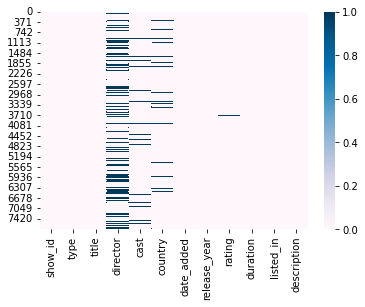

In [ ]:
sns.heatmap(df.isnull(), cmap=('PuBu'))

__8.Check the percentage of missing values for each column.__
- director: This column can be deleted since it has about 30% missing values and about 52% of unique data, hence it does not provide much information for our analysis. However, it will be important for recommender system 
- cast: This column can be deleted too since it has about 9% missing values and about 88% of unique data, hence is also does not provide significant information for analysis. However, it will be important for recommender system 
- country: We replace the missing values with 'United States' since Netflix is originated from United States and most of the movies and TV shows are aired in there. Statistically, looking at the mode of the country column also confirm that 'United States' can be a great replacement for the missing values. 
- date_added:  Since the missing number is small, we can either delete of the missing rows or we can use a little effort to scrape the data from the Internet. 
- rating: Since the missing number is small, we can either delete of the missing rows or we can use a little effort to scrape the data from the Internet. 



In [ ]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

## Data Preprocessing and Handling Missing Data

__1.Deleting 'director' and 'cast' column__

In [ ]:
df.drop(['director', 'cast'], axis = 1, inplace=True)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


__2.Filling the missing 'country' value with 'United States'__

In [ ]:
df['country'].fillna('United States', inplace=True)
df['country'].isnull().sum().any()

False

__3.Since the 'date_added' data for the missing values are not readily avaialble on the Internet, I choose to drop the missing rows.__

In [ ]:
df.dropna(subset=['date_added'], axis=0, inplace=True)
df['date_added'].isnull().sum()

0

In [ ]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


__4.Checking the missing 'rating' movie title and search their 'rating' on Internet__

In [ ]:
df[df['rating'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

   __5. Replacing the missing 'rating' values which are found from IMDb and Netflix.__

In [ ]:
rating_replacements = {67: 'TV-PG', 2359: 'TV-14', 3660: 'TV-MA', 3736: 'TV-MA', 3737: 'TV-MA', 3738: 'TV-MA', 4323: 'PG-13'}
for index, rating in rating_replacements.items():
  print(index,rating)
  df.loc[index,'rating'] = rating
df['rating'].isnull().any()

67 TV-PG
2359 TV-14
3660 TV-MA
3736 TV-MA
3737 TV-MA
3738 TV-MA
4323 PG-13


False

__6. Adding new features__

- We can add new features from the date_added column which are month and year. Also, we can split the duration column into 'season_count' and 'duration'. 'principal_country' is a column containing the first country listed on 'country' column because some of the content are released by multiple countries.

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [ ]:
df['season_count'] = 
df['duration_in_min'] = 
df['principal_country'] = 

- Adding a new column 'target_ages' based on the content 'rating'.

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,duration_in_min,principal_country,target_ages
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,4,,Brazil,Adults
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,,93,Mexico,Adults
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,,78,Singapore,Adults
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,,80,United States,Teens
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,,123,United States,Teens


## Data Visualization(Exploratory Data Analysis)

__Before we start our exploratory data analysis, we should ask some question we are interested in and use the power of visualization to help us understand and answer our question.__
__Some interesting questions:__
1. Does Netflix contains more TV shows or movies?
2. Which country produce the most content?
3. Is the rate of content addition increasing over the year?
4. Which are the most favoured genre?
5. Does kids prefer TV show or movies?

#### 1. What is the composition of Netflix content?

- The movies accounts for 69.1% of the content, which is the majority.

#### 2. Is the rate of addition of movie greater than tv shows or vice versa?

In [ ]:
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]


tv_show_count = 
tv_show_count = 
tv_show_count = 

movie_count = 
movie_count = 
movie_count = 

trace1 = go.Scatter(x=tv_show_count['year_added'], y=tv_show_count['count'], name="TV Shows")
trace2 = go.Scatter(x=movie_count['year_added'], y=movie_count["count"], name="Movies")
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",xaxis_title='Year',yaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- Initially, the rate of addition of TV shows and movies seems to be at the same pace. 
- From 2016 to 2018, a total of 2377 movies have been added while only 976 TV shows have been added
- In 2020, there is a slight increase in the rate of addition of TV shows and a slight reduction in rate of addition of movies which may be a factor of the COVID-19 pandemic.

#### 3. Which month contributes most to content update?

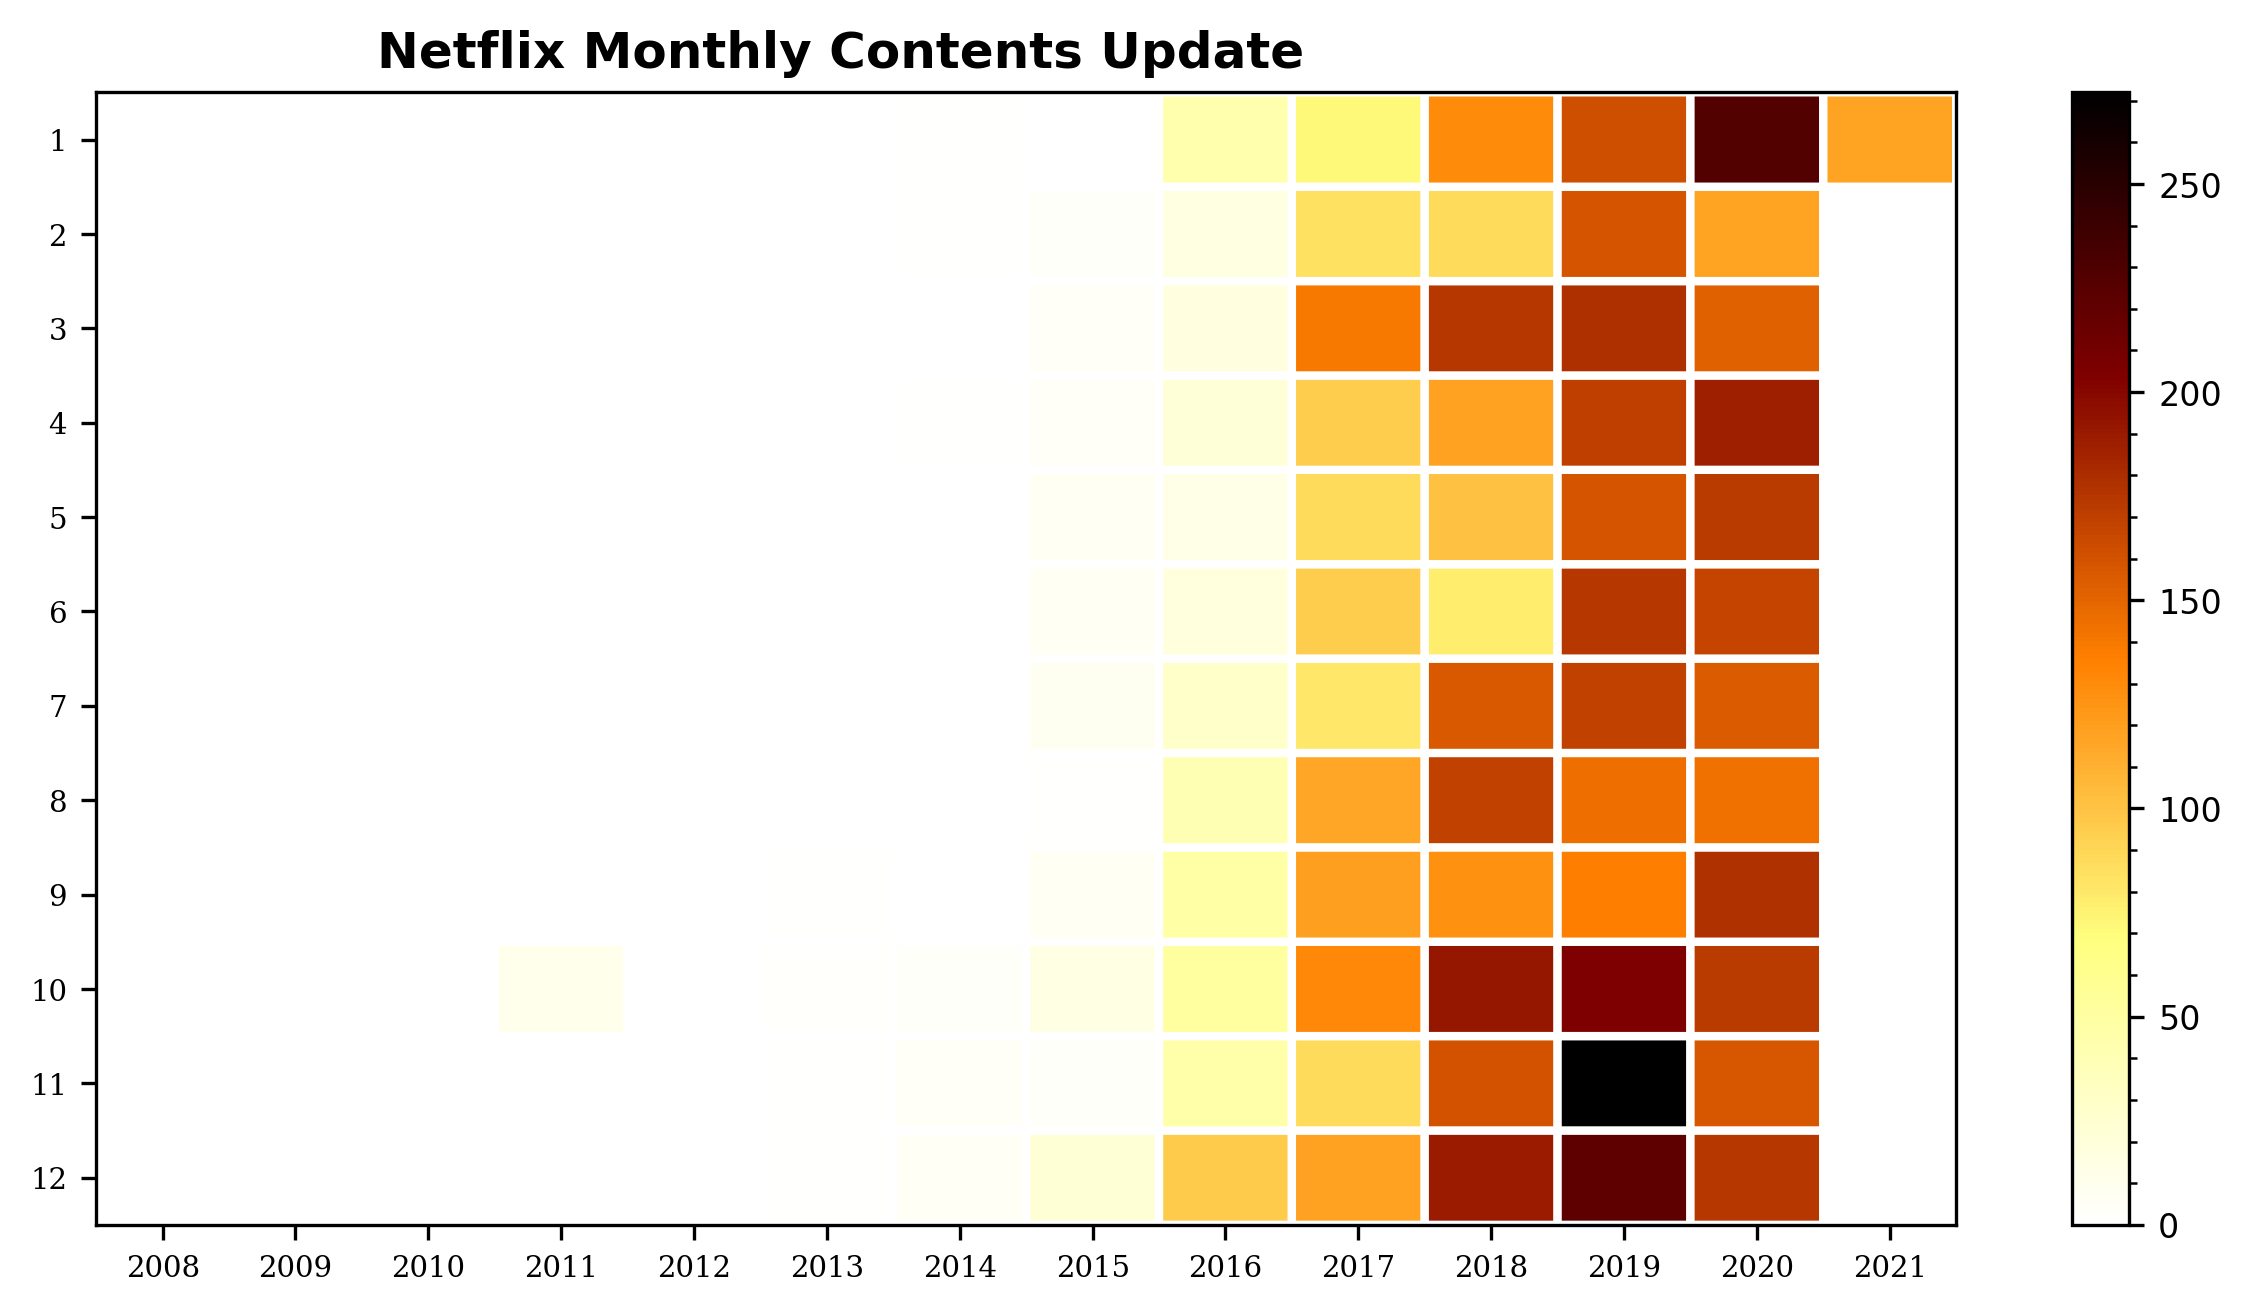

- This heatmap shows that there are more contents being added during the last few months compare to other months.
- This heatmap might not be the best visualization tool to illustrate the question above but I want to learn to plot more different graphs. A bar chart might better visualize the differences. 

#### 4. Do kids prefer TV shows or movies?

In [ ]:
#Write your function to aggregate

In [ ]:
#Write your code to run aggregate and plot

- Movies has about 5.7% more adult content than TV shows.
- TV shows has 30% of content for kids+older kids while movie has only 20%.
- Based on the findings, we can assume that kids prefer TV shows.

#### 5. What does the distribution of rating for TV show and movies look like?

In [ ]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
m1 = {'rating': 'G', 'count': 0}
m2 = {'rating': 'NC-17', 'count': 0}
m3 = {'rating': 'PG', 'count': 0}
m4 = {'rating': 'PG-13', 'count': 0}
movie = 
tv_show = 
movie_rating = 
tv_rating = 



In [ ]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

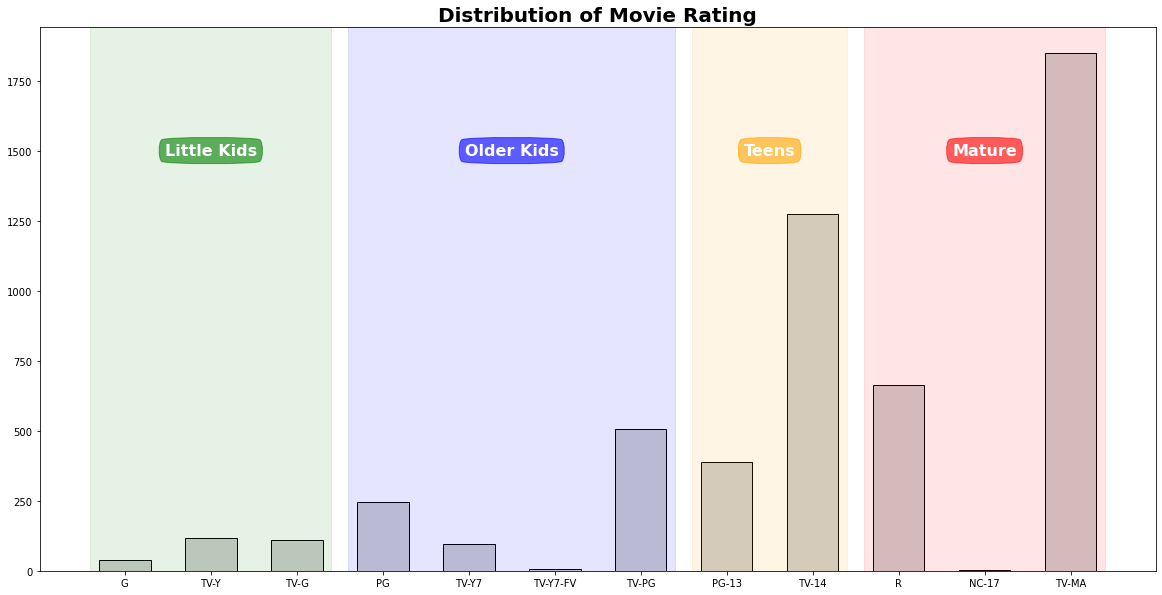

In [ ]:
rating_barplot(movie_rating,'Movie', 1500)

- TV-MA is the most popular rating for Mature movie, and for teens movie, TV-14 has about 3 times more than PG-13 movie.


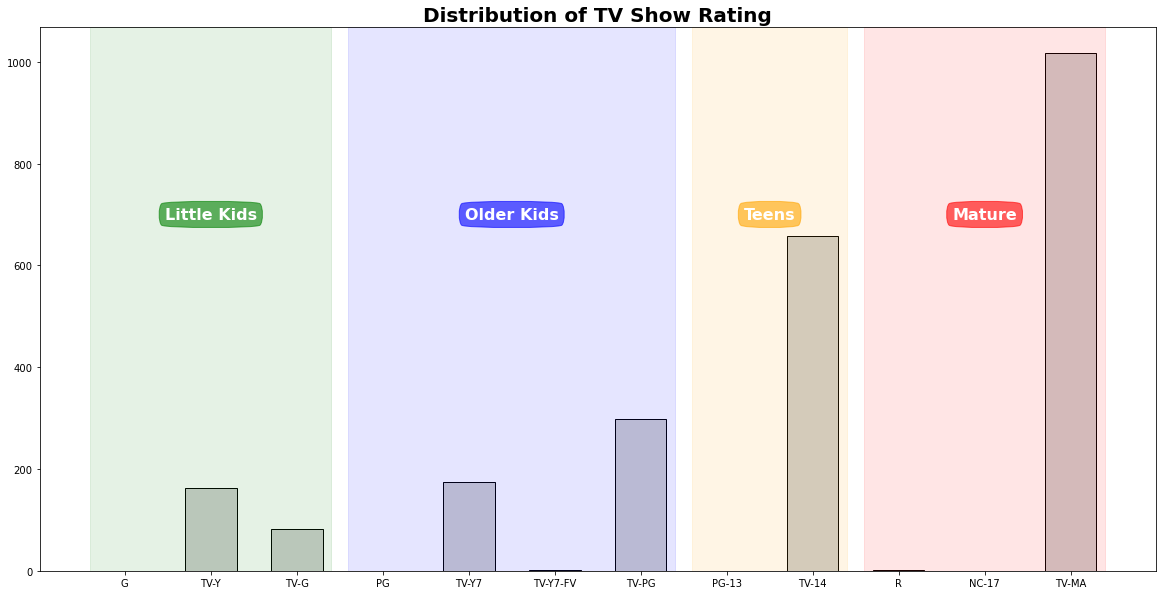

In [ ]:
rating_barplot(tv_rating,'TV Show' , 700)

- For TV show, TV-MA also dominates the Mature content.

#### 6. Which country produces the most content?

In [ ]:
country_df = 

In [ ]:
trace1 = go.Bar(y=country_df['country'], x=country_df['count'], orientation="h", name="")

data = [trace1]
layout = go.Layout(title="Countries with most content",xaxis_title='count', height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- United States, India and United Kingdom is the top 3 countries with the most content.
- As an aspired producer or actor/actress, you might consider this 3 countries for your career.

#### 7. What does the content cumulation over the year look like on a world map?

In [ ]:
country_df2 = 
country_df2['aggregate'] = 



In [ ]:

# year_country2 = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(country_df2, locations="principal_country", color="aggregate", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Cumulative sum of content over the year by country')
fig.show()

- We can see that the North America, India and Europe dominates the content cumulation over the year.

#### 8. What is the range of movie duration for most of movies?

In [ ]:
df.dtypes

show_id                      object
type                         object
title                        object
country                      object
date_added           datetime64[ns]
release_year                  int64
rating                       object
duration                     object
listed_in                    object
description                  object
year_added                    int64
month_added                   int64
season_count                 object
duration_in_min              object
principal_country            object
target_ages                  object
dtype: object

In [ ]:

x1 = movie['duration_in_min'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], [''], bin_size=0.7, curve_type='normal')
fig.update_layout(title_text='Distplot with Normal Distribution',xaxis_title = 'duration in min', yaxis_title='PDF')
fig.show()

- The duration for movies are distributed normally where the peak are in the range between 90 and 100 minutes.

#### 9. Does TV show usually have more than one season?

In [ ]:
bar_season = 
bar_season = 
bar_season['season_count'] = 
bar_season = 

trace1 = go.Bar(x=bar_season['season_count'], y=bar_season["count"], name="TV Shows")
data = [trace1]
layout = go.Layout(title="Seasons for TV Show",yaxis_title = 'count',xaxis_title='Number of Seasons', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- Most of the TV show consist of 1 season only.

#### 10. What are the favourite genre of movies and TV shows respectively?

In [ ]:
from collections import Counter
col = "listed_in"
categories = 
counter_list = 
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Genre distributions of movies",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- The top 3 favourite genre of movies are:
    1. International movies
    2. Dramas
    3. Comedies
 

In [ ]:
col = 
categories = 
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Genre distributions of TV Show",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- The top 3 favourite TV shows genre are:
    1. International TV Shows
    2. TV Dramas
    3. TV Comedies

#### 11. What are the usual keywords in the movie genre?

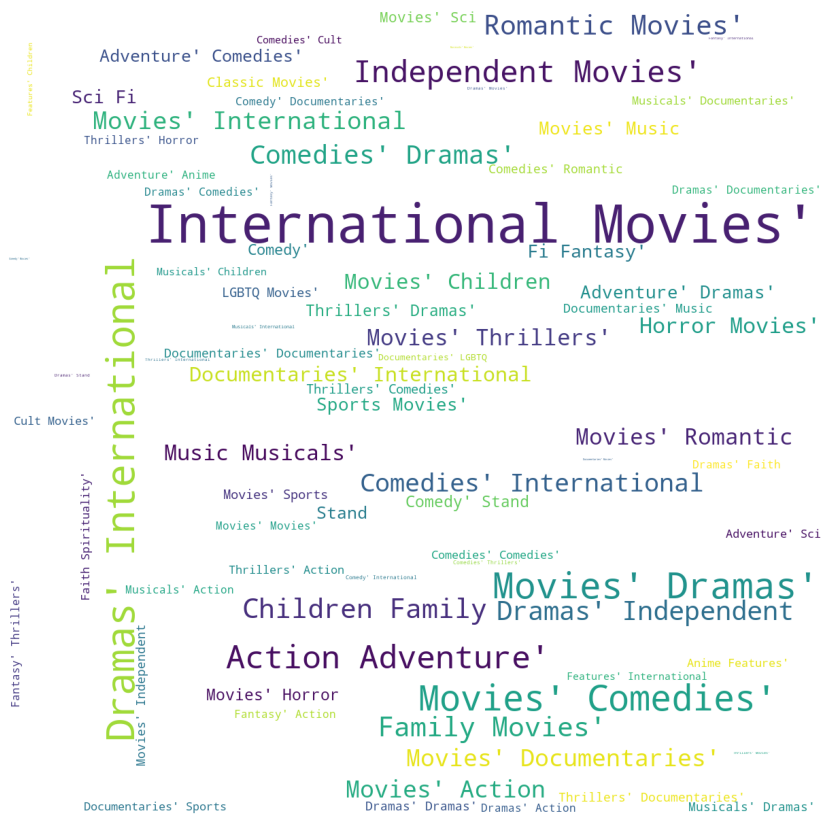

In [ ]:
from wordcloud import WordCloud
categories = 
text = 
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### 12. What are the 20 oldest movies and TV shows on Netflix?

,title,release_year
4960,Prelude to War,1942
6117,The Battle of Midway,1942
7616,Why We Fight: The Battle of Russia,1943
7342,Undercover: How to Operate Behind Enemy Lines,1943
7679,WWII: Report from the Aleutians,1943
6699,The Negro Soldier,1944
6657,The Memphis Belle: A Story of a\nFlying Fortress,1944
7268,Tunisian Victory,1944
3425,Know Your Enemy - Japan,1945
5371,San Pietro,1945


,title,release_year
4867,Pioneers: First Women Filmmakers*,1925
4866,Pioneers of African-American Cinema,1946
6953,The Twilight Zone (Original Series),1963
6082,The Andy Griffith Show,1967
5785,Star Trek,1968
4216,Monty Python's Fliegender Zirkus,1972
4217,Monty Python's Flying Circus,1974
1577,Dad's Army,1977
1949,El Chavo,1979
4478,Ninja Hattori,1981


#### 13. What is the favourite genre for movie from year 2017 onwards?

In [ ]:
year_genre_df = movie[(movie['principal_genre'].isin(top_movies_genres)) & (movie['year_added'] >= 2017)].groupby(['principal_genre', 'year_added']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'year_added', 'count']

fig = px.sunburst(year_genre_df, path=['year_added', 'principal_genre'], values='count')
fig.show()

- Again, this might not be the best visualization for the question, but I take this as a lesson to learn more visualization tools.

## Thank you for reading my first ever notebook!! Your feedback and upvote is very much appreciated. 

### Here are some notebooks I have referenced for this project(shoutout to the authors), do check them out!
 - https://www.kaggle.com/subinium/storytelling-with-data-netflix-ver/data
 - https://www.kaggle.com/shivamb/netflix-shows-and-movies-exploratory-analysis/notebook
 - https://www.kaggle.com/niharika41298/netflix-visualizations-recommendation-eda#Recommendation-System-(Content-Based)
 - https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly/data